# Machine Learning Final Project
Group Member: Yutai Li, Gabriel Nicholson

## PCA for shift detection

In [3]:
import numpy as np
import numpy.linalg as la
import pandas as pd
from scipy.io.arff import loadarff 
from sklearn.decomposition import PCA
import scipy

### Dataset

Source: https://www.openml.org/search?type=data&sort=runs&id=151&status=active
    
Electricity is a widely used dataset described by M. Harries and analyzed by J. Gama. This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

#### Features:
**Date**: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1

**Day**: day of the week (1-7)

**Period**: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1

**NSWprice**: New South Wales electricity price, normalized between 0 and 1

**NSWdemand**: New South Wales electricity demand, normalized between 0 and 1

**VICprice**: Victoria electricity price, normalized between 0 and 1

**VICdemand**: Victoria electricity demand, normalized between 0 and 1

**transfer**: scheduled electricity transfer between both states, normalized between 0 and 1

#### Target Variable:

**class**:  the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours

In [4]:
raw_data = loadarff('electricity-normalized.arff')
df = pd.DataFrame(raw_data[0])
df['target'] = np.where(df['class'] == b'UP', 1, 0)
df = pd.get_dummies(df.drop(columns='class'))

In [10]:
df.tail()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target,day_b'1',day_b'2',day_b'3',day_b'4',day_b'5',day_b'6',day_b'7'
45307,0.9158,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,0,0,0,0,0,0,0,1
45308,0.9158,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,0,0,0,0,0,0,0,1
45309,0.9158,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,0,0,0,0,0,0,0,1
45310,0.9158,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,1,0,0,0,0,0,0,1
45311,0.9158,1.000000,0.050679,0.288753,0.003542,0.355256,0.231140,0,0,0,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   period     45312 non-null  float64
 2   nswprice   45312 non-null  float64
 3   nswdemand  45312 non-null  float64
 4   vicprice   45312 non-null  float64
 5   vicdemand  45312 non-null  float64
 6   transfer   45312 non-null  float64
 7   target     45312 non-null  int64  
 8   day_b'1'   45312 non-null  uint8  
 9   day_b'2'   45312 non-null  uint8  
 10  day_b'3'   45312 non-null  uint8  
 11  day_b'4'   45312 non-null  uint8  
 12  day_b'5'   45312 non-null  uint8  
 13  day_b'6'   45312 non-null  uint8  
 14  day_b'7'   45312 non-null  uint8  
dtypes: float64(7), int64(1), uint8(7)
memory usage: 3.1 MB


In [227]:
first = df.query('date < 0.45')
second = df.query('date > 0.98')
v1 = np.sqrt(np.sum((scipy.linalg.svdvals(first) - scipy.linalg.svdvals(second))**2))
U, S, VT = la.svd(first)
U_s, S_s, VT_s = la.svd(second)
print(v1)

first = df.query('date < 0.45')
second = df.query('date > 0.90')
v2 = np.sqrt(np.sum((scipy.linalg.svdvals(first) - scipy.linalg.svdvals(second))**2))
print(v2)

first = df.query('date < 0.60')
second = df.query('date > 0.60 and date < 0.90')
U, S, VT = la.svd(first)
U_s, S_s, VT_s = la.svd(second)
v3 = np.sqrt(np.sum((scipy.linalg.svdvals(first) - scipy.linalg.svdvals(second))**2))
print(v3)

first = df.query('date < 0.45')
second = df.query('date > 0.90')

190.37229263333418
97.65797924750096
77.65509729067612


In [228]:
np.round(VT[0], 2)

array([-0.24, -0.46, -0.05, -0.37, -0.  , -0.35, -0.38, -0.46, -0.12,
       -0.12, -0.12, -0.12, -0.12, -0.12, -0.11])

In [229]:
np.round(VT_s[0], 2)

array([-0.59, -0.36, -0.04, -0.32, -0.  , -0.31, -0.4 , -0.33, -0.09,
       -0.09, -0.1 , -0.1 , -0.1 , -0.1 , -0.1 ])

In [230]:
print(np.dot(VT_s[0], VT[0]))
print(np.dot(VT_s[1], VT[1]))
print(np.dot(VT_s[2], VT[2]))
print(np.dot(VT_s[3], VT[3]))

0.9196151271197981
0.924274411102636
-0.832632420087531
0.014504586130451452


In [231]:
print(np.dot(VT_s[0], VT[0]))
print(np.dot(VT_s[1], VT[1]))
print(np.dot(VT_s[2], VT[2]))
print(np.dot(VT_s[3], VT[3]))

0.9196151271197981
0.924274411102636
-0.832632420087531
0.014504586130451452


In [189]:
X = first.drop(columns=['target', 'date'])
y = first['target']
weights = la.inv(X.T @ X) @ X.T @ y

In [190]:
test_X = second.drop(columns=['target', 'date'])
test_y = second['target']

In [191]:
weights.index = X.columns

In [192]:
corr_compare = pd.DataFrame({'first':first.corr().round(2)['target'], 'second':second.corr().round(2)['target']})
corr_compare

,first,second
date,0.01,-0.05
period,0.17,0.11
nswprice,0.58,0.54
nswdemand,0.34,0.41
vicprice,0.21,0.15
vicdemand,0.15,0.38
transfer,-0.09,-0.17
target,1.00,1.00
day_b'1',0.07,0.01
day_b'2',-0.01,0.14


In [193]:
weights.loc['vicdemand'] *= 1.23
# weights.loc["day_b'2'"] *= 1.23
pred_y = test_X.values @ weights

In [194]:
print(f"train error: {np.mean(np.where(X.values @ weights < 0.5, 0, 1) == y)}")
print(f"test error: {np.mean(np.where(pred_y < 0.5, 0, 1) == test_y)}")

train error: 0.8180423594615994
test error: 0.8333333333333334


### Using resampling approaches at the data drift point 

1. The case where we are doing the data analysis in real time. Retrain the model with more weight on the most recent data?
2. The case where we have SOME of the test values but not all of them. Once again we can train on these with higher weights on these samples. 
3. Use the PCA and K-Means approach?


**How does Sklearn implement their sample weighting?**

- I think one approach is to make a new loss function where it is disjoint? 
- Another approach for this project is making probabilities more uncertain for drifted data and comparing the log-loss of this function compared to the regular one. The theory predicts that higher uncertainity should lead to a better loss. 

### Applying PCA

In [14]:
pca_99 = PCA(.999)

In [15]:
before = df.query('date <= 0.8')
after = df.query('date > 0.8')
X_before = before.drop(columns=['target', 'date'])
y_before = before['target']

In [26]:
X_after = after.drop(columns=['target', 'date'])
y_after = after['target']

In [30]:
X_after.shape

(16272, 13)

In [29]:
X_before.shape

(29040, 13)

In [19]:
components = pca_99.fit_transform(X_before)
componentsDf = pd.DataFrame(data = components)
componentsDf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.215637,-0.112728,0.843011,-0.175446,-0.198261,0.000120,0.497076,0.137403,0.021949,-0.035649,-0.009262
1,-0.213058,-0.112749,0.842914,-0.174970,-0.198776,0.000115,0.483539,0.114010,0.006473,-0.027446,-0.012641
2,-0.209559,-0.112775,0.842779,-0.174378,-0.199465,0.000116,0.471557,0.086779,-0.012509,-0.017687,-0.011237
3,-0.199392,-0.112843,0.842408,-0.172894,-0.201359,0.000112,0.470731,0.030446,-0.053419,0.004178,-0.013452
4,-0.190381,-0.112904,0.842076,-0.171567,-0.203048,0.000111,0.467977,-0.020776,-0.090707,0.023902,-0.013062


In [21]:
components.shape

(29040, 11)

In [23]:
np.dot(components.T, components).shape

(11, 11)

In [32]:
pca_99.singular_values_

array([65.35800436, 64.62223551, 64.62115867, 64.41751411, 64.32711042,
       64.24957089, 52.07666441, 24.69744594, 19.68248427,  9.80618966,
        5.4611653 ])

In [35]:
V = pca_99.components_

Now we have the principal comopnets of `X_before`, then we want to project `X_after` to the principal componets of `X_before` to get a projection matrix of `X_after`

In [45]:
X_projection = X_after@V.T@V
X_projection.shape

(16272, 13)

Then, we want to compare the statistical distribution of each of the features in `X_before` with the one in `X_projection` by using *KL-divergence* to see if the distribution of each feature changes. If the change-score pass a certain threshold, then it is likely that the distribution of the training data is different from that in the test data. 

The definition of *KL-divergence* for continus variable is as follow $$D_{KL}(P \parallel Q) = \int_{-\infty}^{\infty} p(x)\log(\frac{p(x)}{q(x)}) dx\$$

In [41]:
from scipy.stats import norm

In [47]:
X_projection[:][0]

29040   -4.449208e-07
29041    2.127652e-02
29042    4.255247e-02
29043    6.382946e-02
29044    8.510550e-02
             ...     
45307    9.148936e-01
45308    9.361696e-01
45309    9.574466e-01
45310    9.787226e-01
45311    9.999996e-01
Name: 0, Length: 16272, dtype: float64

In [51]:
norm.pdf(X_projection[:][0])/norm.pdf(X_projection[:][1])

array([1.00059464, 1.00032815, 0.99966111, ..., 0.63290425, 0.62077441,
       0.60728361])

In [65]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p.dot(np.log(p / q)), 0))

In [66]:
def get_change_score(f_before, f_after):
    p = norm.pdf(f_before)
    q = norm.pdf(f_after)
    change_score = kl_divergence(p,q)
    
    return change_score

In [59]:
X_array = X_before.to_numpy()

In [71]:
norm.pdf(X_array[:][0]).shape

(13,)

In [76]:
X_array[:,0].shape

(29040,)

In [72]:
X_array.shape
X_projection.shape

(16272, 13)

In [90]:
get_change_score(X_projection[:][1], X_array[:16272,1])

51096.43748490194

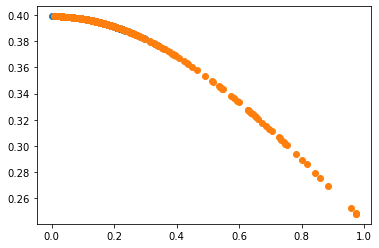

In [100]:
import matplotlib.pyplot as plt
plt.scatter(X_array[:16272,1], norm.pdf(X_array[:16272,1]))
plt.scatter(X_projection[:][1], norm.pdf(X_projection[:][1]))

In [97]:
norm.pdf(X_projection[:][1])

array([0.39870519, 0.39872115, 0.39871638, ..., 0.39857705, 0.39808093,
       0.39844781])